In [16]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import pyarrow as pa
import os

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from datetime import datetime
import seaborn as sns

In [6]:
flag = 0
for filename in os.listdir('city=Singapore'):
    if flag == 0:
        sg = pq.read_table('city=Singapore/'+filename)
        sg = sg.to_pandas()
        flag = 1
    else:
        temp = pq.read_table('city=Singapore/'+filename)
        temp = temp.to_pandas()
        sg = sg.append(temp)

flag = 0
for filename in os.listdir('city=Jakarta'):
    if flag == 0:
        jkt = pq.read_table('city=Jakarta/'+filename)
        jkt = jkt.to_pandas()
        flag = 1
    else:
        temp = pq.read_table('city=Jakarta/'+filename)
        temp = temp.to_pandas()
        jkt = jkt.append(temp)

<bound method DataFrame.info of         trj_id driving_mode   osname  pingtimestamp    rawlat      rawlng  \
0        70014          car  android     1554943236  1.342326  103.888969   
1        73573          car  android     1555582623  1.321781  103.856366   
2        75567          car  android     1555141026  1.327088  103.861273   
3         1410          car  android     1555731693  1.262482  103.823794   
4         4354          car  android     1555584497  1.283799  103.807210   
...        ...          ...      ...            ...       ...         ...   
3032564  72196          car  android     1554771148  1.326351  103.890147   
3032565  58589          car      ios     1555842124  1.322549  103.970248   
3032566  80684          car  android     1554720657  1.300553  103.907405   
3032567    498          car      ios     1554990704  1.347160  103.966904   
3032568  82408          car  android     1554688141  1.420871  103.798199   

             speed  bearing  accuracy  
0  

In [7]:
sg = sg.sample(frac = (0.05))
jkt = jkt.sample(frac = (0.05))

In [34]:
def unixToHour(string_):
    string_ = int(string_)
    return int(datetime.utcfromtimestamp(string_).strftime("%H"))+int(datetime.utcfromtimestamp(string_).strftime("%M"))/60

In [35]:
sg["pingtimestamp"] = sg["pingtimestamp"].apply(unixToHour)

In [40]:
X = sg[["speed", "pingtimestamp"]]
max_k = 20
print(k)

17


In [41]:
# distortions = [] 
# for i in range(1, max_k+1):
#     if len(X) >= i:
#         kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#         pipe = make_pipeline(StandardScaler(), kmeans)
#         pipe.fit(X)
#         distortions.append(pipe[-1].inertia_)
    
# k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
#      in np.diff(distortions,2)]))

kmeans = KMeans(n_clusters = 17, init="k-means++")
kmeans = make_pipeline(StandardScaler(), kmeans)
kmeans = kmeans.fit(X)
kmeans = kmeans[-1]

In [42]:
sg['Clusters'] = kmeans.labels_
sg.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,Clusters
198084,82357,car,ios,16.516667,1.377989,103.839075,5.690000,189,10.0,12
277337,23718,car,ios,10.600000,1.378664,103.758765,6.730000,63,10.0,0
2517191,79872,car,ios,0.250000,1.396493,103.846774,21.580000,282,10.0,2
2779909,11620,car,android,11.016667,1.376092,103.910093,22.007978,34,3.9,1
2267231,69910,car,android,1.966667,1.349243,103.791483,15.015258,71,4.7,11


C:\Users\bryan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


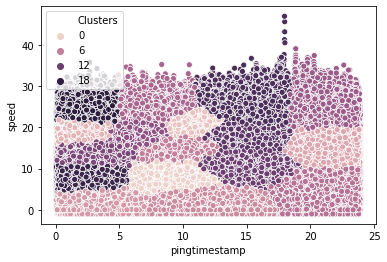

In [44]:
#2d


ax = sns.scatterplot(x="pingtimestamp", y="speed", hue='Clusters', data=sg)
#ax.axis('equal')